# July-P2 Batch Oasis Infobyte SIP

# Task 3 - Car Price Prediction

# **1. Data and Packages Loading**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Assuming you have a CSV file named "car_data.csv" containing the car features and prices.
car_data_path = 'data_master_CarPrice.csv'
df = pd.read_csv(car_data_path)



In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.drop('car_ID', axis=1, inplace=True)


In [5]:
df.columns


Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [6]:
ObjectCols , NumCols = [], []


In [7]:
ObjectCols=df.select_dtypes(include='object').columns.tolist()
NumCols = df.select_dtypes(include=("int", "float")).columns.tolist()

In [8]:
print(ObjectCols)


['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [9]:
print(NumCols)


['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


## Data Visualisation

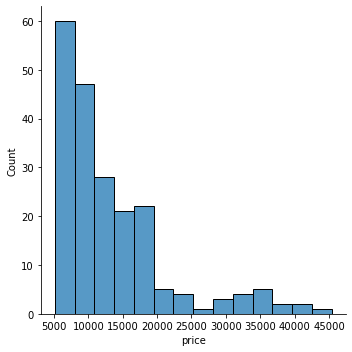

In [10]:
sns.displot(df['price'])
plt.show()

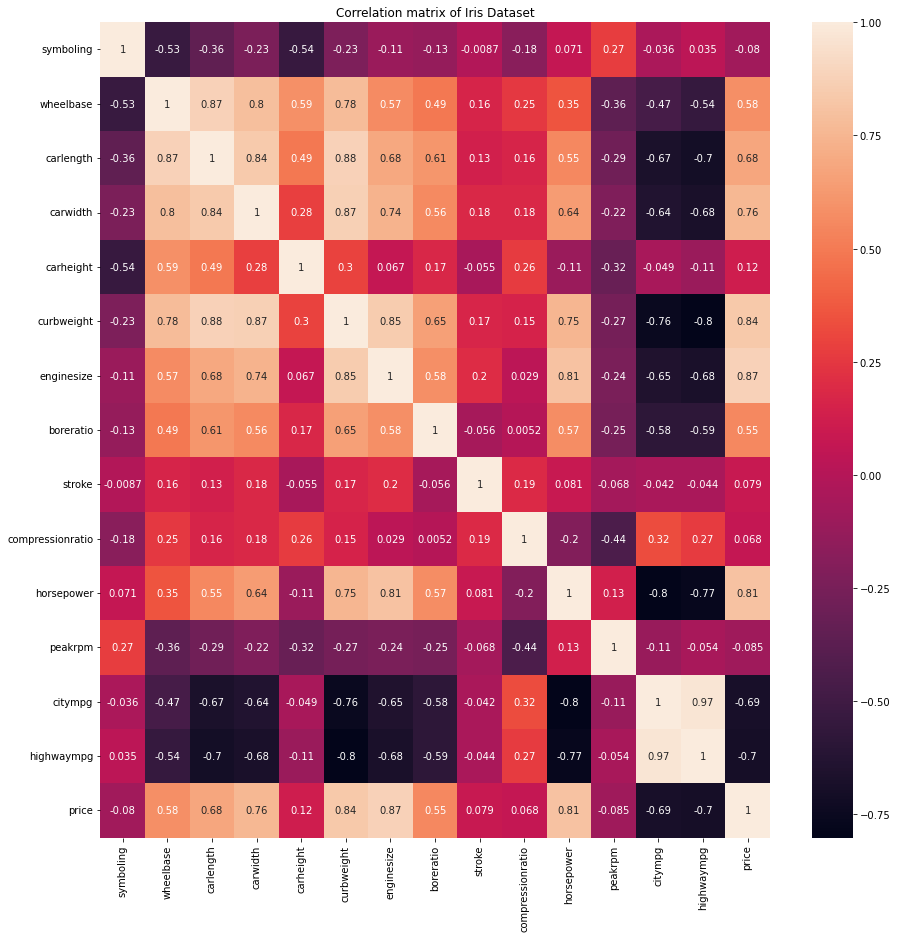

In [11]:
plt.figure(figsize=(15,15))
plt.title("Correlation matrix of Iris Dataset")

sns.heatmap(df.corr(), annot=True)
plt.show()

In [12]:
target = 'price'
CarData = df[NumCols]

In [13]:

X = CarData.drop(target, axis=1)
y = CarData[target]

print(X.head(1))

print("\n"*5)
print(y.head(1))


   symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   

   citympg  highwaympg  
0       21          27  






0    13495.0
Name: price, dtype: float64


## Model Implementing

In [14]:
# Split the data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)


In [15]:
# Create a Linear Regression model
LNR_model = LinearRegression()

# Train the model using the training data
LNR_model.fit(X_train, y_train)


LinearRegression()

In [19]:
# Make predictions on the test data
y_pred = LNR_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 14358029.116948258
R-squared: 0.8181239192410069


In [20]:
rgr = DecisionTreeRegressor()
DTR_model = rgr.fit(X_train, y_train)

In [21]:
rgr =RandomForestRegressor()
RFR_model = rgr.fit(X_train, y_train)

In [22]:
def return_calc(test_data, model_name):
    
    name = str(model_name)
    predictions = model_name.predict(test_data)
    r2 = r2_score(y_test, predictions)

    print(f"""
        >>{name}
            R2_SCORE : {r2:.2%}
    """)
    

## Model Score

In [23]:
return_calc(X_test, DTR_model)
return_calc(X_test, RFR_model)
return_calc(X_test, LNR_model)


        >>DecisionTreeRegressor()
            R2_SCORE : 88.57%
    

        >>RandomForestRegressor()
            R2_SCORE : 95.89%
    

        >>LinearRegression()
            R2_SCORE : 81.81%
    
